In [1]:
# Version check. Written for Python 3.5.4
import sys
print(sys.version)
#3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 18:10:19) 
#[GCC 7.2.0]


3.8.5 (default, Sep  4 2020, 02:22:02) 
[Clang 10.0.0 ]


In [2]:
import matplotlib
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.axes as axes
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
from sympy import *
from sympy.utilities.autowrap import autowrap
import re
from matplotlib.lines import Line2D


%matplotlib inline

In [3]:
DATE = "20220315"
MNR = "M021"
DESCR = ""

In [4]:
# Define the path to the input folder containing the output parameters
# Write down the path to the folder that
# contains the parameter estimates of all the finished runs
inputFolder = "/Users/muriel/Documents/LACDR/Projects/PHH/Models/v2_firstRevision/Output/M021/CDDP/20220317_093500/" 

# Define the path to the parameter estimates
fileName = "20220317_093500_MH_M021Model_parameterEstimates_parmset5_cost_74.19.csv" 

# Read in the file with the parameter estimates
file = inputFolder+fileName

In [5]:
# Stress level decrease
def sFunction(s_init,r,t):
    out = s_init * np.exp(-r*t)
    return out

In [6]:
def facetplot(solList, varnames, title = "Model"):
    nrows = len(varnames)
    ncols = len(solList)
    fig, ax = plt.subplots(nrows,ncols,sharex=True, sharey='row')

    for i,sol in enumerate(solList):
        for row in range(0,nrows):
            ax[row,i].plot(t,sol[:,row], color = "#000000")
    
    for row in range(0,nrows):
        ax[row,ncols-1].set_ylabel(varnames[row], rotation = -90, fontsize = 12)
        ax[row,ncols-1].yaxis.set_label_coords(1.03,0.5)


    # add a big axes, hide frame
    fig.add_subplot(111, frameon=False)
    fig.subplots_adjust(hspace=0.1)
    fig.set_figheight(16)
    fig.set_figwidth(12)
    fig.suptitle(title, fontsize = 18)

    # hide tick and tick label of the big axes
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.grid(False)
    plt.xlabel("Time (h)", fontsize=16)
    plt.ylabel("Intensity (a.u.)", fontsize=16)

In [7]:
def facetplot_addP53(solList, varnames, varnames_total, title = "Model"):
    nrows = len(varnames_total)
    ncols = len(solList)
    
    p53_ids = []
    for i,vn in enumerate(varnames):
        if vn == "p53" or vn == "p53p":
            p53_ids.append(i)
    
    fig, ax = plt.subplots(nrows,ncols,sharex=True, sharey='row')

    for i,sol in enumerate(solList):
        for row in range(0,p53_ids[0]):
            ax[row,i].plot(t,sol[:,row], color = "#000000")
            
        ax[p53_ids[0],i].plot(t,sol[:,p53_ids[0]] + sol[:,p53_ids[1]], color = "#000000")
        
        for row in range(p53_ids[1],nrows):
            ax[row,i].plot(t,sol[:,row+1], color = "#000000")
    
    for row in range(0,nrows):
        ax[row,ncols-1].set_ylabel(varnames_total[row], rotation = -90, fontsize = 12)
        ax[row,ncols-1].yaxis.set_label_coords(1.03,0.5)


    # add a big axes, hide frame
    fig.add_subplot(111, frameon=False)
    fig.subplots_adjust(hspace=0.1)
    fig.set_figheight(16)
    fig.set_figwidth(12)
    fig.suptitle(title, fontsize = 18)

    # hide tick and tick label of the big axes
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.grid(False)
    plt.xlabel("Time (h)", fontsize=16)
    plt.ylabel("Intensity (a.u.)", fontsize=16)

In [8]:
def facetplot_allP53(solList, varnames, varnames_total, title = "Model"):
    nrows = len(varnames_total)
    ncols = len(solList)
    
    p53_ids = []
    for i,vn in enumerate(varnames):
        if vn == "p53" or vn == "p53p":
            p53_ids.append(i)
    
    fig, ax = plt.subplots(nrows,ncols,sharex=True, sharey='row')

    for i,sol in enumerate(solList):
        for row in range(0,p53_ids[0]):
            ax[row,i].plot(t,sol[:,row], color = "#000000")
            
        ax[p53_ids[0],i].plot(t,sol[:,p53_ids[0]], color = "#000000", linestyle = "dashed")
        ax[p53_ids[0],i].plot(t,sol[:,p53_ids[1]], color = "#000000", linestyle = "dotted")
        ax[p53_ids[0],i].plot(t,sol[:,p53_ids[0]] + sol[:,p53_ids[1]], color = "#000000")
        
        for row in range(p53_ids[1],nrows):
            ax[row,i].plot(t,sol[:,row+1], color = "#000000")
    
    for row in range(0,nrows):
        ax[row,ncols-1].set_ylabel(varnames_total[row], rotation = -90, fontsize = 12)
        ax[row,ncols-1].yaxis.set_label_coords(1.03,0.5)


    # add a big axes, hide frame
    fig.add_subplot(111, frameon=False)
    fig.subplots_adjust(hspace=0.1)
    fig.set_figheight(16)
    fig.set_figwidth(12)
    fig.suptitle(title, fontsize = 18)

    # hide tick and tick label of the big axes
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.grid(False)
    plt.xlabel("Time (h)", fontsize=16)
    plt.ylabel("Intensity (a.u.)", fontsize=16)

In [9]:
def plot(dzdt, t, header):
    
    figureSize = (5,4)
    #tick_locs = np.arange(min(t), max(t)+1, 12*60)
    #tick_labels = tick_locs/60
    
    t = [i * 1 for i in t]
    
    f1 = plt.figure(figsize = figureSize)
    plt.plot(t,dzdt[:,7], "--", label = 'early G1', color = "k", alpha = 0.2,linewidth=3)
    plt.plot(t,dzdt[:,8], "--", label = 'G0', color = "grey", alpha = 0.2,linewidth=3)
    plt.plot(t,dzdt[:,7]+dzdt[:,8], label = 'G0 & early G1', color = "grey",linewidth=3)
    plt.plot(t,dzdt[:,9], label = 'G1', color = "r",linewidth=3)
    plt.plot(t,dzdt[:,10], label = 'G1/S', color = "y",linewidth=3)
    plt.plot(t,dzdt[:,11], label = 'S & G2', color = "g",linewidth=3)
    #plt.plot(t,dzdt[:,1]+dzdt[:,2]+dzdt[:,3]+dzdt[:,4]+dzdt[:,5], "--", label = 'N', color = "k")
    plt.xlabel('Time (h)', fontsize=22)
    plt.ylabel('Number of cells', fontsize=22)
    plt.legend(fontsize=12)
    plt.xlim(0,(t)[-1]+5)
    plt.title(header, fontsize=24)
    #plt.xticks(tick_locs,tick_labels)
    plt.ylim(0,12)
    plt.show()
    #f.savefig("Plots/atr.pdf", bbox_inches='tight')

    f3 = plt.figure(figsize = figureSize)
    plt.plot(t,dzdt[:,6], label = 'Space', color = "b")
    plt.xlabel('Time (h)', fontsize=18)
    plt.ylabel('Intensity', fontsize=18)
    plt.legend(fontsize=12)
    plt.xlim(0,(t)[-1]+5)
    #plt.xticks(tick_locs,tick_labels)
    plt.ylim(0,1.1)
    plt.show()
    #f.savefig("Plots/atr.pdf", bbox_inches='tight')

In [10]:
# Define ODE model
def p53signaling(z,t,args):
    [sFunction, r, s_init] = args

    # Molecular model
    ## Upstream of p53 ##
    S = sFunction(s_init,r,t)
    
    # Initial states 
    DD,P53rna,P53,P53P,MDM2rna,MDM2,P21rna,P21,BTG2rna,BTG2 = z
    
    # ODEs
    dDD = ks_dd - kd_dd * DD * P53P + S
    dP53rna = ks_p53rna - kd_p53rna * P53rna
    dP53 = ks_p53 * P53rna + k_dp * P53P - k_p * P53 * DD - kd_p53 * P53 - kd_p53_mdm2 * MDM2 * P53
    dP53P = k_p * P53 * DD - k_dp * P53P - kd_p53p * P53P - kd_p53p_mdm2 * MDM2 * P53P
    dMDM2rna = ks_mdm2rna + (ks_mdm2_p53p * P53P**1) / (Km_mdm2**1 + P53P**1) - kd_mdm2rna * MDM2rna
    dMDM2 = ks_mdm2 * MDM2rna - kd_mdm2 * MDM2
    dP21rna = ks_p21rna + (ks_p21_p53p * P53P**1) / (Km_p21**1 + P53P**1) - kd_p21rna * P21rna
    dP21 = ks_p21  * P21rna - kd_p21 * P21
    dBTG2rna = ks_btg2rna + (ks_btg2_p53p * P53P**1) / (Km_btg2**1 + P53P**1) - kd_btg2rna * BTG2rna
    dBTG2 = ks_btg2  * BTG2rna - kd_btg2 * BTG2

    # Output
    dzdt = [dDD, dP53rna, dP53, dP53P, dMDM2rna, dMDM2, dP21rna, dP21, dBTG2rna, dBTG2] 
    return dzdt

In [11]:
# Define the parameters
parameterEst = pd.read_csv(file)

pAllNew = parameterEst["est_value"].values

# Make the parameters global variables
for i in parameterEst.iterrows():
    sText = str(parameterEst.iloc[i[0], 0]) + " = " + str(parameterEst.iloc[i[0], 2])
    print(sText)
    exec(sText)


DD_init = 10.777582721816692
P53P_init = 0.32277357731981243
EC2 = 2.7053942573936407
EC3 = 6.907755278921776
tau1 = 0.09784740804443316
kd_dd = 2.76229561236569e-06
k_dp = 0.9999999999982048
kd_p53 = 0.0116463246197059
kd_p53p = 4.427061601100238e-07
kd_p53_mdm2 = 0.0006787479089162062
kd_p53p_mdm2 = 0.009902174516468245
ks_mdm2rna = 1.1887552741494902e-05
ks_mdm2_p53p = 0.16156363304405078
ks_p21rna = 0.002316544556326873
ks_p21_p53p = 11.913385133019075
Km_mdm2 = 0.08709050326887388
Km_p21 = 999.9999993345764
Km_btg2 = 0.389549188893804
ks_btg2rna = 0.02007799403925406
ks_btg2_p53p = 0.11592465288341156
sf_p53 = 68.44939418597752
sf_mdm2 = 3.4466747360534318
sf_p21 = 1.3836055816059631
sf_btg2 = 1.1039956808137674
offset_p53 = -90.47812666874846
offset_mdm2 = -3.3477425611886944
offset_p21 = -1.327897951843222
offset_btg2 = -1.0904576526913023
ks_dd = 9.609250036939914e-06
ks_p53rna = 1.0
k_p = 0.0302451754645464
ks_p53 = 0.015521375714398643
kd_mdm2rna = 0.12724546149148008
ks_mdm2

In [12]:
EC1 = 1
kd_p53rna = 1
P53rna_init = 1
MDM2rna_init = 1
P21rna_init = 1
BTG2rna_init = 1
P53_init = 1
MDM2_init = 1
P21_init = 1
BTG2_init = 1
kd_btg2 = 1
kd_p21 = 1
kd_mdm2 = 1

In [13]:
# Check steady states
# ODEs
dDD = ks_dd - kd_dd * DD_init * P53P_init
dP53rna = ks_p53rna - kd_p53rna * P53rna_init
dP53 = ks_p53 * P53rna_init + k_dp * P53P_init - k_p * P53_init * DD_init - kd_p53 * P53_init - kd_p53_mdm2 * MDM2_init * P53_init
dP53P = k_p * P53_init * DD_init - k_dp * P53P_init - kd_p53p * P53P_init - kd_p53p_mdm2 * MDM2_init * P53P_init
dMDM2rna = ks_mdm2rna + (ks_mdm2_p53p * P53P_init**1) / (Km_mdm2**1 + P53P_init**1) - kd_mdm2rna * MDM2rna_init
dMDM2 = ks_mdm2 * MDM2rna_init - kd_mdm2 * MDM2_init
dP21rna = ks_p21rna + (ks_p21_p53p * P53P_init**1) / (Km_p21**1 + P53P_init**1) - kd_p21rna * P21rna_init
dP21 = ks_p21  * P21rna_init - kd_p21 * P21_init
dBTG2rna = ks_btg2rna + (ks_btg2_p53p * P53P_init**1) / (Km_btg2**1 + P53P_init**1) - kd_btg2rna * BTG2rna_init
dBTG2 = ks_btg2  * BTG2rna_init - kd_btg2 * BTG2_init


# Output
steady_state = [dDD, dP53rna, dP53, dP53P, dMDM2rna, dMDM2, dP21rna, dP21, dBTG2rna, dBTG2]
print(steady_state)

[0.0, 0.0, 1.4257258568184383e-16, -1.3400738851920835e-16, 0.0, 0.0, -8.673617379884035e-19, 0.0, 0.0, 0.0]


In [14]:
# initial condition
z = [DD_init,P53rna_init,P53_init,P53P_init,MDM2rna_init,MDM2_init,P21rna_init,P21_init,BTG2rna_init,BTG2_init]

# time points
t = np.linspace(1,43*3,43*3)

# solve ODE
dzdt_Control = odeint(p53signaling,z,t, args = ([sFunction,tau1,0],))

dzdt_Cisplatin1 = odeint(p53signaling,z,t, args = ([sFunction,tau1,EC1],))
dzdt_Cisplatin2 = odeint(p53signaling,z,t, args = ([sFunction,tau1,EC2],))
dzdt_Cisplatin3 = odeint(p53signaling,z,t, args = ([sFunction,tau1,EC3],))


In [15]:
stressLevels = [0,EC1,EC2,EC3]

sols = list()
for stressLevel in stressLevels:
    # solve ODE
    dzdt = odeint(p53signaling,z,t, args = ([sFunction,tau1,stressLevel],))
    sols.append(dzdt)


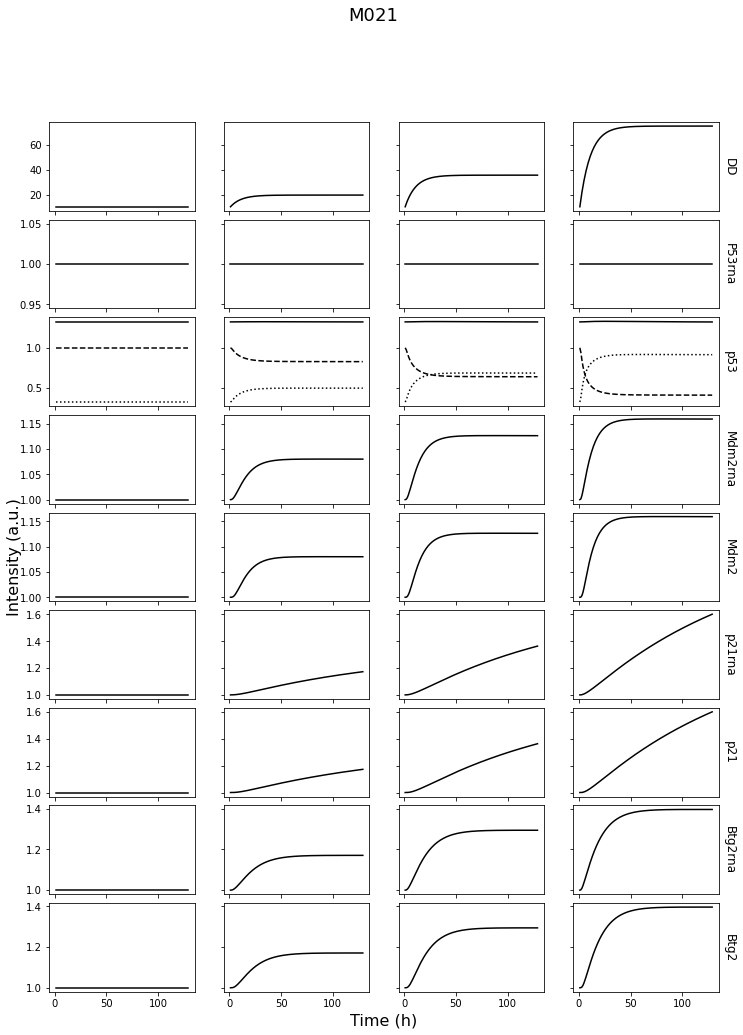

In [16]:
facetplot_allP53([dzdt_Control,dzdt_Cisplatin1,dzdt_Cisplatin2,dzdt_Cisplatin3], 
                  ["DD","P53rna","p53","p53p","Mdm2rna","Mdm2","p21rna","p21","Btg2rna","Btg2"],
                  ["DD","P53rna","p53","Mdm2rna","Mdm2","p21rna","p21","Btg2rna","Btg2"],
                 title = MNR)

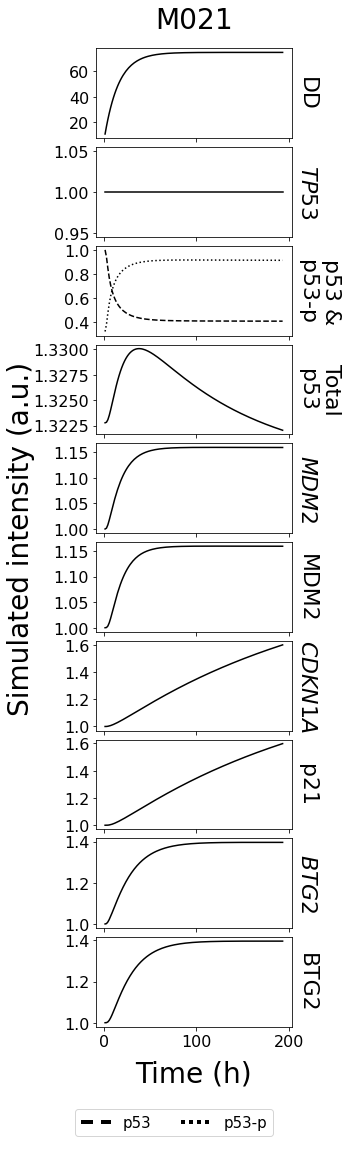

In [17]:
varnames = ["DD","P53rna","p53","p53p","Mdm2rna","Mdm2","p21rna","p21","Btg2rna","Btg2"]
varnames_total = ["DD","$TP53$","p53 &\np53-p","Total\np53","$MDM2$","MDM2","$CDKN1A$","p21","$BTG2$","BTG2"]
sol = dzdt_Cisplatin3 #dzdt_Control,dzdt_Cisplatin1,dzdt_Cisplatin2,
title = MNR

nrows = len(varnames_total)
fig, ax = plt.subplots(nrows,1,sharex=True, sharey='row')

ax[0].plot(t*1.5,sol[:,0], color = "#000000")
ax[1].plot(t*1.5,sol[:,1], color = "#000000")
ax[2].plot(t*1.5,sol[:,2], color = "#000000", linestyle = "dashed")
ax[2].plot(t*1.5,sol[:,3], color = "#000000", linestyle = "dotted")
ax[3].plot(t*1.5,sol[:,2] + sol[:,3], color = "#000000")
ax[4].plot(t*1.5,sol[:,4], color = "#000000")
ax[5].plot(t*1.5,sol[:,5], color = "#000000")
ax[6].plot(t*1.5,sol[:,6], color = "#000000")
ax[7].plot(t*1.5,sol[:,7], color = "#000000")
ax[8].plot(t*1.5,sol[:,8], color = "#000000")
ax[9].plot(t*1.5,sol[:,9], color = "#000000")


    #ax[row].plot(t*1.5,sol[:,row], color = color, linewidth = 4)
    #ax[row].tick_params(axis = 'both', labelsize=16)
    #ax[row].locator_params(axis='y', nbins=4)

for row in range(0,nrows):
    ax[row].set_ylabel(varnames_total[row], rotation = -90, fontsize = 22)
    ax[row].yaxis.set_label_coords(1.03,0.5)
    ax[row].tick_params(axis = 'both', labelsize=16)
    ax[row].locator_params(axis='y', nbins=4)

    #ax[row].set_ylim(bottom=0)

ax[0].set_title(title,fontdict={'fontsize': 28}, pad=20)

# Legend
custom_lines = [#Line2D([0], [0], color="grey", lw=4),
                Line2D([0], [0], color="#000000", lw=4, dashes=[3,2]),
                Line2D([0], [0], color="#000000", lw=4, dashes=[1,1])]

# add a big axes, hide frame
fig.legend(custom_lines, (["p53","p53-p"]), 
      fontsize = 15, loc = "lower center", borderaxespad=2, ncol = 3)

# add a big axes, hide frame
fig.add_subplot(111, frameon=False)
fig.subplots_adjust(hspace=0.1)
fig.set_figheight(18)
fig.set_figwidth(3.5)
# if not title == "":
#     fig.suptitle(title, fontsize = 24)

# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel("Time (h)", fontsize=28, labelpad=16)
plt.ylabel("Simulated intensity (a.u.)", fontsize=28, labelpad=38)

fig.savefig("/Users/muriel/Documents/LACDR/Projects/PHH/Models/v2_firstRevision/Notebooks/Figures/FigS7_M021_differentStructure.pdf", bbox_inches='tight')



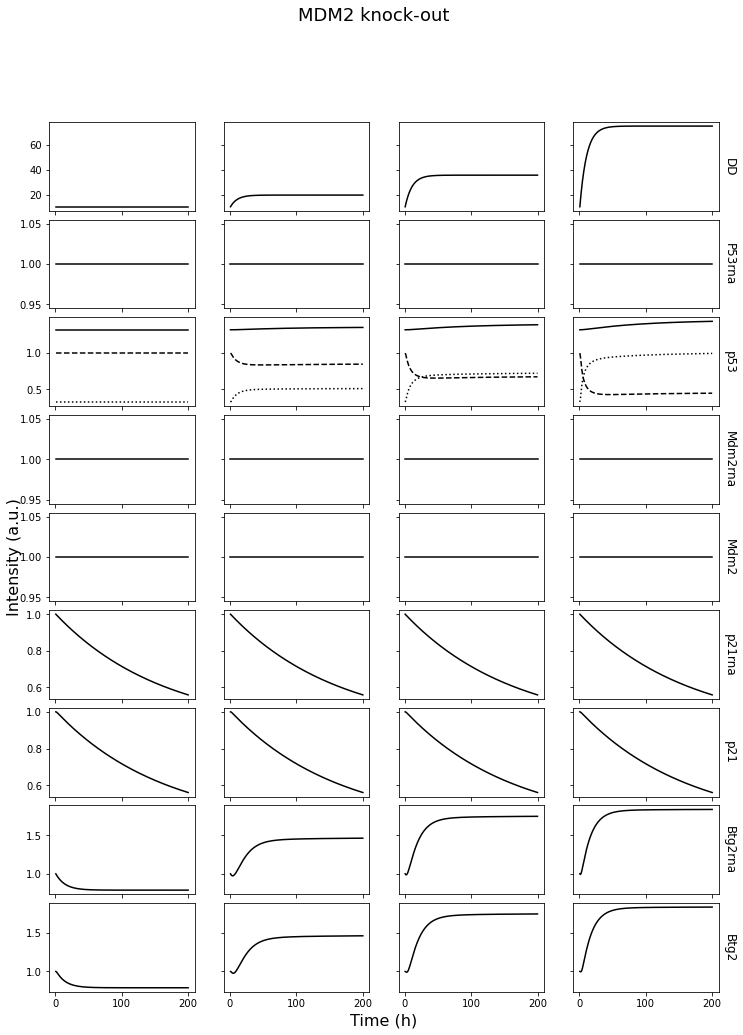

In [18]:
### MDM2 knock out

# Define ODE model
MDM2_KO = 0

def mdm2_KO(z,t,args):
    # Define ODE model
    [sFunction, r, s_init] = args

    # Molecular model
    ## Upstream of p53 ##
    S = sFunction(s_init,r,t)
    
    # Initial states 
    DD,P53rna,P53,P53P,MDM2rna,MDM2,P21rna,P21,BTG2rna,BTG2 = z
    
    # ODEs
    dDD = ks_dd - kd_dd * DD * P53P + S
    dP53rna = ks_p53rna - kd_p53rna * P53rna
    dP53 = ks_p53 * P53rna + k_dp * P53P - k_p * P53 * DD - kd_p53 * P53 - kd_p53_mdm2 * MDM2 * P53
    dP53P = k_p * P53 * DD - k_dp * P53P - kd_p53p * P53P - kd_p53p_mdm2 * MDM2 * P53P
    dMDM2rna = MDM2_KO # ks_mdm2rna + (ks_mdm2_p53p * P53P**4) / (Km_mdm2**4 + P53P**4) - kd_mdm2rna * MDM2rna
    dMDM2 = ks_mdm2 * MDM2rna - kd_mdm2 * MDM2
    dP21rna = ks_p21rna + (ks_p21_p53p * P53P**4) / (Km_p21**4 + P53P**4) - kd_p21rna * P21rna
    dP21 = ks_p21  * P21rna - kd_p21 * P21
    dBTG2rna = ks_btg2rna + (ks_btg2_p53p * P53P**4) / (Km_btg2**4 + P53P**4) - kd_btg2rna * BTG2rna
    dBTG2 = ks_btg2  * BTG2rna - kd_btg2 * BTG2

    # Output
    dzdt = [dDD, dP53rna, dP53, dP53P, dMDM2rna, dMDM2, dP21rna, dP21, dBTG2rna, dBTG2] 

    return dzdt

# initial condition
z = [DD_init,P53rna_init,P53_init,P53P_init,MDM2rna_init,MDM2_init,P21rna_init,P21_init,BTG2rna_init,BTG2_init]


# time points
t = np.linspace(1,200,200)

# solve ODE
dzdt_Control = odeint(mdm2_KO,z,t, args = ([sFunction,tau1,0],))

dzdt_Cisplatin1 = odeint(mdm2_KO,z,t, args = ([sFunction,tau1,EC1],))
dzdt_Cisplatin2 = odeint(mdm2_KO,z,t, args = ([sFunction,tau1,EC2],))
dzdt_Cisplatin3 = odeint(mdm2_KO,z,t, args = ([sFunction,tau1,EC3],))

facetplot_allP53([dzdt_Control,dzdt_Cisplatin1,dzdt_Cisplatin2,dzdt_Cisplatin3], 
                  ["DD","P53rna","p53","p53p","Mdm2rna","Mdm2","p21rna","p21","Btg2rna","Btg2"],
                  ["DD","P53rna","p53","Mdm2rna","Mdm2","p21rna","p21","Btg2rna","Btg2"],
                 title = "MDM2 knock-out")

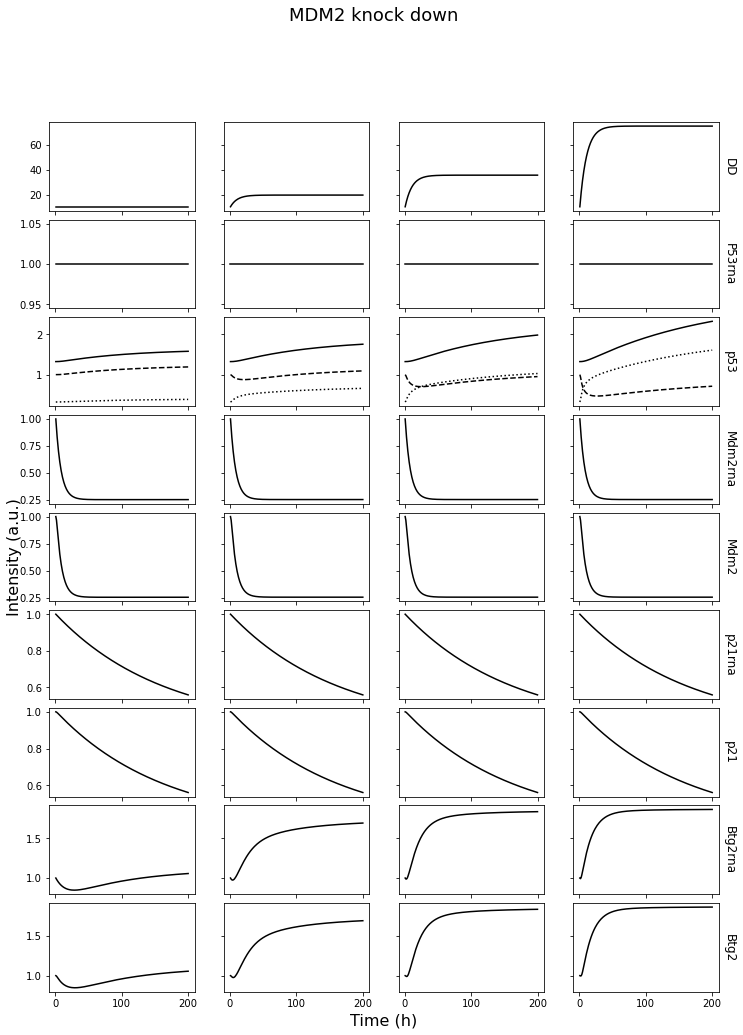

In [19]:
### MDM2 knock down

# Define ODE model
def mdm2_KD(z,t,args):
    # Define ODE model
    [sFunction, r, s_init] = args

    # Molecular model
    ## Upstream of p53 ##
    S = sFunction(s_init,r,t)
    
    # Initial states 
    DD,P53rna,P53,P53P,MDM2rna,MDM2,P21rna,P21,BTG2rna,BTG2 = z
    
    # ODEs
    dDD = ks_dd - kd_dd * DD * P53P + S
    dP53rna = ks_p53rna - kd_p53rna * P53rna
    dP53 = ks_p53 * P53rna + k_dp * P53P - k_p * P53 * DD - kd_p53 * P53 - kd_p53_mdm2 * MDM2 * P53
    dP53P = k_p * P53 * DD - k_dp * P53P - kd_p53p * P53P - kd_p53p_mdm2 * MDM2 * P53P
    dMDM2rna = 0.2 * (ks_mdm2rna + (ks_mdm2_p53p * P53P**4) / (Km_mdm2**4 + P53P**4)) - kd_mdm2rna * MDM2rna
    dMDM2 = ks_mdm2 * MDM2rna - kd_mdm2 * MDM2
    dP21rna = ks_p21rna + (ks_p21_p53p * P53P**4) / (Km_p21**4 + P53P**4) - kd_p21rna * P21rna
    dP21 = ks_p21  * P21rna - kd_p21 * P21
    dBTG2rna = ks_btg2rna + (ks_btg2_p53p * P53P**4) / (Km_btg2**4 + P53P**4) - kd_btg2rna * BTG2rna
    dBTG2 = ks_btg2  * BTG2rna - kd_btg2 * BTG2

    # Output
    dzdt = [dDD, dP53rna, dP53, dP53P, dMDM2rna, dMDM2, dP21rna, dP21, dBTG2rna, dBTG2] 

    return dzdt

# initial condition
z = [DD_init,P53rna_init,P53_init,P53P_init,MDM2rna_init,MDM2_init,P21rna_init,P21_init,BTG2rna_init,BTG2_init]


# time points
t = np.linspace(1,200,200)

# solve ODE
dzdt_Control = odeint(mdm2_KD,z,t, args = ([sFunction,tau1,0],))

dzdt_Cisplatin1 = odeint(mdm2_KD,z,t, args = ([sFunction,tau1,EC1],))
dzdt_Cisplatin2 = odeint(mdm2_KD,z,t, args = ([sFunction,tau1,EC2],))
dzdt_Cisplatin3 = odeint(mdm2_KD,z,t, args = ([sFunction,tau1,EC3],))

facetplot_allP53([dzdt_Control,dzdt_Cisplatin1,dzdt_Cisplatin2,dzdt_Cisplatin3], 
                  ["DD","P53rna","p53","p53p","Mdm2rna","Mdm2","p21rna","p21","Btg2rna","Btg2"],
                  ["DD","P53rna","p53","Mdm2rna","Mdm2","p21rna","p21","Btg2rna","Btg2"],
                 title = "MDM2 knock down")